# CAP 5768 - Data Science - Adam Corbin - Fall 2019

## Assignment 4: Statistical analysis - Part 2
## Starter code

### Goals 

- To practice the computation and displaying of representative statistical distributions.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To compute moments and skewness measures.
- To increase our statistical analysis skills.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.


### Instructions

- This assignment is structured in 3 parts, each one using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 142 (plus up to 40 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [138]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import math

-------------------
## Part 1: Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

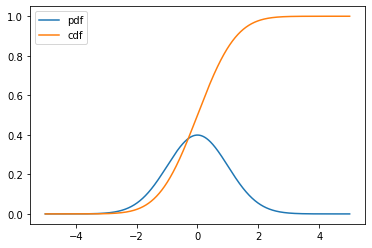

In [2]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

## Your turn! (12 points, i.e., 6 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot. 
They will probably look like this:
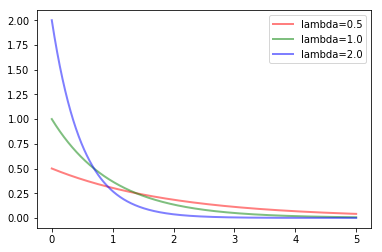

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.
They will probably look like this:
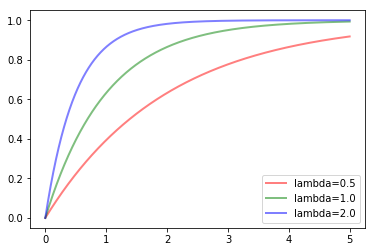

## Solution

#1


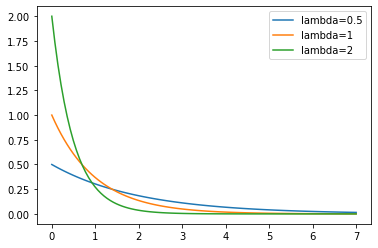

In [23]:
print("#1")
x = np.linspace(0, 7, 100)
y0_5 = ss.expon.pdf(x,scale=1/0.5)
y1 = ss.expon.pdf(x,scale=1)
y2 = ss.expon.pdf(x,scale=1/2)
plt.plot(x, y0_5, label='lambda=0.5')
plt.plot(x, y1, label='lambda=1')
plt.plot(x, y2, label='lambda=2')
plt.legend();

#2


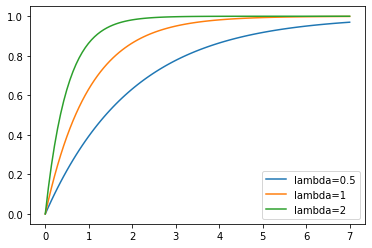

In [24]:
print("#2")
x = np.linspace(0, 7, 100)
y0_5 = ss.expon.cdf(x,scale=1/0.5)
y1 = ss.expon.cdf(x,scale=1)
y2 = ss.expon.cdf(x,scale=1/2)
plt.plot(x, y0_5, label='lambda=0.5')
plt.plot(x, y1, label='lambda=1')
plt.plot(x, y2, label='lambda=2')
plt.legend();

-------------------
## Part 2: Empirical distributions vs. analytic distributions

The question we are trying to answer in this part is: **How well can we model empirical distributions with analytic distributions?**

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available on Canvas, if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

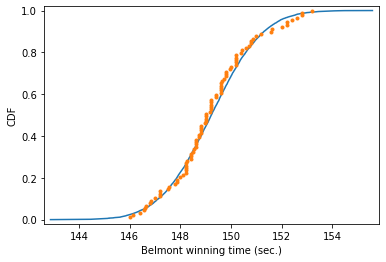

In [190]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


## Questions 1-2 (6 points, i.e., 3 pts each)

1. Does the empirical distribution of the data resemble a normal distribution? 
2. What other *plots* could you produce to better investigate (visually) the claim that the Belmont Stakes results are normally distributed? 

## Solution

1. Yes the data points track the normal distribution line very closely after the outliers were removed.
2. We could plot using the normal distribution plot which gives lines and if the appear to be straight, then they will trend toward a normal distribution

In [216]:
import thinkplot
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    xs, ys = thinkstats2.NormalProbability(weights)

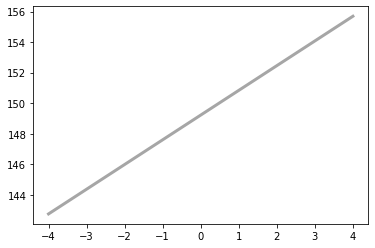

In [225]:
# This was an attempt to plot the normal distribution plot
MakeNormalPlot(belmont_no_outliers)

## BONUS (20 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array. 
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.

## Solution

In [76]:
# mu, sigma = 0, 0.1 # mean and standard deviation
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
samples = np.random.normal(mu,sigma, 1000000)
fast_samples = list(filter(lambda x: x<=144, samples))
fast_count = len(fast_samples)
print("In 1,000,000 sampes over normal distribution there a total of that were fast as or faster than Secretariat:")
print(fast_count)
probility = fast_count/len(samples)
print("The fraction comes to ",round(probility,6), " Or percentage chance %", round(probility*100,4),sep="")


In 1,000,000 sampes over normal distribution there a total of that were fast as or faster than Secretariat:
623
The fraction comes to 0.000623 Or percentage chance %0.0623


## Your turn (30 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed.

The dataset (``michelson_speed_of_light.csv``) is available on Canvas. 
Hint: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array. 
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

## Solution

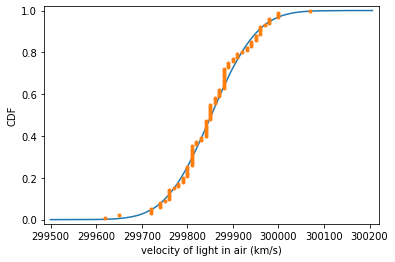

In [191]:
file = 'data/michelson_speed_of_light.csv'
msol = pd.read_csv(file) 
volecity_of_light_in_air = msol["velocity of light in air (km/s)"]
volecity_of_light_in_air
mu = volecity_of_light_in_air.mean()
sigma = volecity_of_light_in_air.std()
samples = np.random.normal(mu,sigma, 100000)
samples
x_theor, y_theor = ecdf(samples)
x, y = ecdf(volecity_of_light_in_air)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('velocity of light in air (km/s)')
_ = plt.ylabel('CDF')
plt.show()

## Questions 3-4 (6 points, i.e., 3 pts each)

3. Does the empirical distribution of the data resemble a normal distribution? 
4. What other *plots* could you produce to better investigate (visually) the claim that the Michelson speed of light measurements are normally distributed? 

(SOLUTION)
3. Yes the data appears to be a normal distribution 
4. Same as before as to use a normal distribution plot 

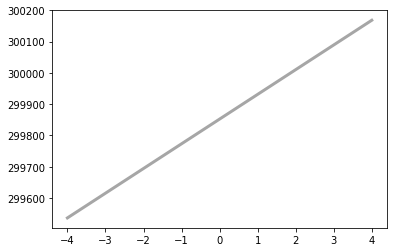

In [224]:
# This was an attempt to plot the normal distribution plot
MakeNormalPlot(volecity_of_light_in_air)

## Solution

## Your turn (30 points)

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper. 

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale. (See Figure 5-2 in the textbook)

## Solution

In [188]:
file = 'data/babies_brisbane.csv'
babies = pd.read_csv(file) 
babies.describe()

,Unnamed: 0,time,sex,weight_g,minutes
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,21.500000,1296.000000,1.590909,3275.954545,788.727273
std,12.845233,690.704561,0.497350,528.032458,416.066931
min,0.000000,5.000000,1.000000,1745.000000,5.000000
25%,10.750000,792.750000,1.000000,3141.500000,482.750000
50%,21.500000,1406.500000,2.000000,3404.000000,846.500000
75%,32.250000,1918.500000,2.000000,3571.750000,1158.500000
max,43.000000,2355.000000,2.000000,4162.000000,1435.000000


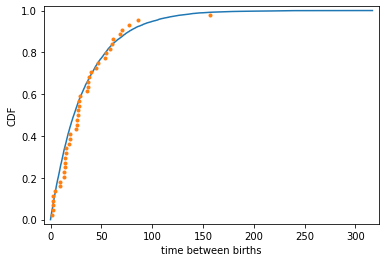

In [226]:
baby_time = babies["minutes"]
diffs = babies["minutes"].diff()
lam = diffs.mean()
samples = np.random.exponential(scale=lam, size=10_000)

x_theor, y_theor = ecdf(samples)
x, y = ecdf(diffs)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('time between births')
_ = plt.ylabel('CDF')
plt.show()

CCDF


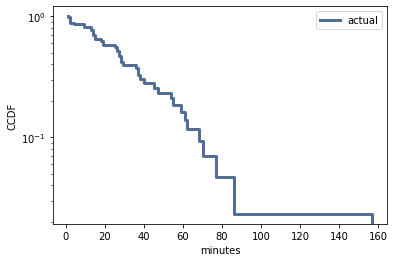

<Figure size 576x432 with 0 Axes>

In [223]:
import thinkstats2, thinkplot
diffs = babies["minutes"].diff()
print("CCDF")

thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes',
ylabel='CCDF',
yscale='log')

-------------------
## Part 3: Moments and skewness

Let's revisit the dataset of salaries from Assignment 1 and use it to measure skewness.

In [84]:
salaries = pd.read_csv('../assignment_1/data/salaries.csv')
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


# Your turn (32 points, i.e., 8 pts each)

Write Python code to:
1. Compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the skewness using ``scipy.stats.skew``

## Solution

In [137]:
# functions
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)


In [159]:
def compute_questions(dataset):    
    print("1.")
    print("Mean",dataset.mean())
    print("Median",dataset.median())
    print()
    
    print("2.")
    k = 1
    raw_moment = RawMoment(dataset,k)
    print("raw_moment", raw_moment)
    print("raw_moment == mean:" , raw_moment == dataset.mean())
    print()
    
    print("3.")
    central_moment = CentralMoment(dataset,2)
    print("Variance", np.var(dataset))
    print("Central Moment", central_moment)
    print("Variance == Central Moment:", round(np.var(dataset),4) == round(central_moment,4))
    print()
    
    print("4.")
    print(ss.skew(earn))
    print("Taking a look at the books way of computing Skewness")
    print("Skewness:", Skewness(earn))
    print()

In [160]:
print("Questions for earn accross the whole dataset")
compute_questions(salaries["earn"])

Questions for earn accross the whole dataset
1.
Mean 23154.773489932886
Median 20000.0

2.
raw_moment 23154.773489932886
raw_moment == mean: True

3.
Variance 378852251.6248677
Central Moment 378852251.6248667
Variance == Central Moment: True

4.
2.880309741267592
Taking a look at the books way of computing Skewness
Skewness: 2.8803097412676006



## Question 5 (6 points)

5. How do you interpret the value of skewness computed by your code?

## Solution

A positive value of Skewness means that data skews to the right of the magnitude. Other than that, this value can be hard to discern meaning. Skewness is not robust when there any many outliers in the dataset

## Bonus! (20 points)

Write code to repeat the steps above, this time for male and female employees separately.

## Solution

In [161]:
female_earn = salaries[salaries["sex"] == "female"]["earn"]
print("Female questions")
compute_questions(female_earn)

Female questions
1.
Mean 18280.195050946142
Median 15000.0

2.
raw_moment 18280.195050946142
raw_moment == mean: True

3.
Variance 203049680.6286218
Central Moment 203049680.62862173
Variance == Central Moment: True

4.
2.880309741267592
Taking a look at the books way of computing Skewness
Skewness: 2.8803097412676006



In [162]:
male_earn = salaries[salaries["sex"] == "male"]["earn"]
print("Male questions")
compute_questions(male_earn)

Male questions
1.
Mean 29786.130693069306
Median 25000.0

2.
raw_moment 29786.130693069306
raw_moment == mean: True

3.
Variance 541713403.7611371
Central Moment 541713403.7611367
Variance == Central Moment: True

4.
2.880309741267592
Taking a look at the books way of computing Skewness
Skewness: 2.8803097412676006



## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
1. What have you learned from this assignment?
2. Which parts were the most fun, time-consuming, enlightening, tedious?
3. What would you do if you had an additional week to work on this?

## Solution

1. From this assignment I have a better understanding of distributions and using random number generators to help build a model that could fit a dataset. This could be used to help predict future values based on probability. Also about the moments and how they can be related to mean and variance. Diving into what skewness means, how to compute it and how to use it. Even though it seems skewness isnt super useful it can help show where the data is leaning towards the right or the left.

2. Trying to compute the CCDF for babies brisabne has been the most challenging thing so far. I think its because the Stat book uses its own library functions to create the graph and I have been resistant to use it mainly for the same reasons Dr. Marques has stated in the class, but mainly because they are not standard libraries. I ended up bring over the code to plot the CCDF. I think i kinda understand whats its doing but it also feels black magic to me. I also found that if i used the Panda's build in Var method vs np.var() I got slightly different values. the np.var() appeared to be close to the central moment so I went with np.var(). One more thing, I tried to use the authors code for MakeNormalPlot for the normal distribution plot and it just plot a straight line. I was expecting something a little different based on what I saw in the book. 

3. I would love to dive deeper into the CCDF and figure out how to build that graph on my own without the authors code. Also understand more what MakeNormalPlot does and how I could use it better.